In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
train_df=pd.read_csv("/content/drive/MyDrive/Machine Learning Lab Assignment/titanic_Train_DT.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_df=pd.read_csv("/content/drive/MyDrive/Machine Learning Lab Assignment/titanic_Test_DT.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
print('Number of Training={}'.format(train_df.shape[0]))
print('Number of Test={}'.format(test_df.shape[0]))

Number of Training=891
Number of Test=484


In [9]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [12]:
test_df.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,484.000000,484.000000,484,484,386.000000,484.000000,484.000000,484,484.000000,107,483
unique,NaN,NaN,484,2,NaN,NaN,NaN,409,NaN,84,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,19950,NaN,G6,S
freq,NaN,NaN,1,303,NaN,NaN,NaN,4,NaN,4,351
mean,242.500000,2.332645,NaN,NaN,29.003886,0.574380,0.384298,NaN,31.505224,NaN,NaN
std,139.863028,0.820852,NaN,NaN,14.422303,1.163918,0.786165,NaN,47.805153,NaN,NaN
min,1.000000,1.000000,NaN,NaN,0.750000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,121.750000,2.000000,NaN,NaN,20.000000,0.000000,0.000000,NaN,7.925000,NaN,NaN
50%,242.500000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.427100,NaN,NaN
75%,363.250000,3.000000,NaN,NaN,37.000000,1.000000,0.000000,NaN,29.268750,NaN,NaN


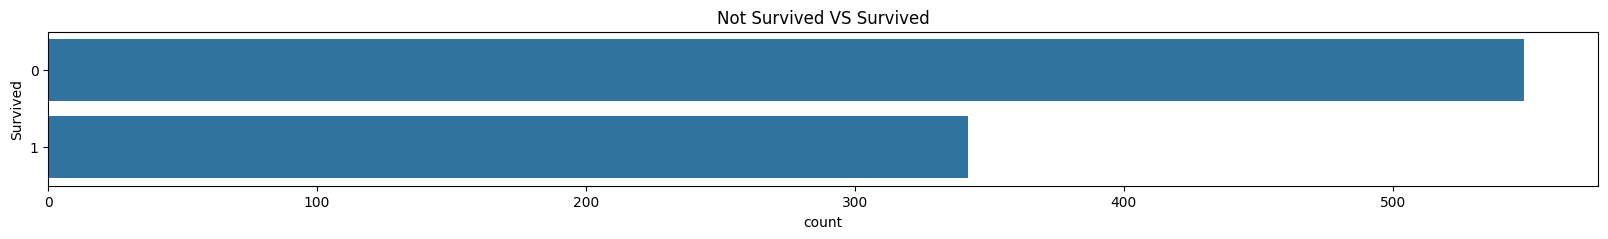

In [13]:
plt.figure(figsize=(20,2))
sns.countplot(y='Survived',data=train_df)
plt.title("Not Survived VS Survived")
plt.show()

In [14]:
train_df=train_df.drop(["Name"],axis=1)
test_df=test_df.drop(["Name"],axis=1)

In [15]:
train_df=train_df.drop(["Age"],axis=1)
test_df=test_df.drop(["Age"],axis=1)

In [16]:
train_df=train_df.drop(["Ticket"],axis=1)
test_df=test_df.drop(["Ticket"],axis=1)

In [17]:
train_df=train_df.drop(["Cabin"],axis=1)
test_df=test_df.drop(["Cabin"],axis=1)

In [18]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [19]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

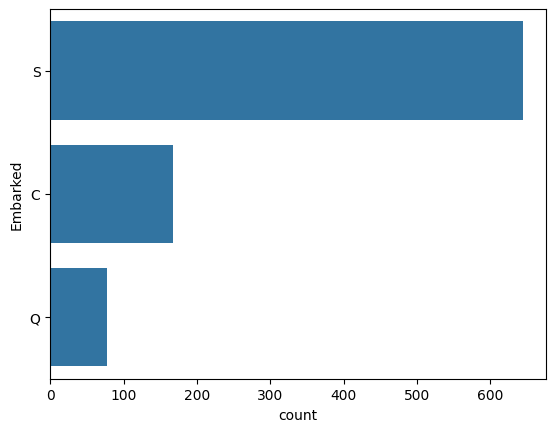

In [21]:
sns.countplot(y="Embarked",data=train_df)

train_df=train_df.fillna({'Embarked':'S'})

In [22]:
train_df['Sex']=np.where(train_df["Sex"]=="female",1,0)
test_df["Sex"]=np.where(test_df["Sex"]=="female",1,0)

In [23]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1,0,7.2500,S
1,2,1,1,1,1,0,71.2833,C
2,3,1,3,1,0,0,7.9250,S
3,4,1,1,1,1,0,53.1000,S
4,5,0,3,0,0,0,8.0500,S


In [24]:
embarked_n=pd.get_dummies(train_df['Embarked'],prefix='embarked')
sex_n=pd.get_dummies(train_df['Sex'],prefix='sex')
pclass_n=pd.get_dummies(train_df['Pclass'],prefix='pclass')

In [25]:
df_new=pd.concat([train_df,
                     embarked_n,
                     sex_n,
                     pclass_n],axis=1)
df_new.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,embarked_C,embarked_Q,embarked_S,sex_0,sex_1,pclass_1,pclass_2,pclass_3
0,1,0,3,0,1,0,7.2500,S,0,0,1,1,0,0,0,1
1,2,1,1,1,1,0,71.2833,C,1,0,0,0,1,1,0,0
2,3,1,3,1,0,0,7.9250,S,0,0,1,0,1,0,0,1
3,4,1,1,1,1,0,53.1000,S,0,0,1,0,1,1,0,0
4,5,0,3,0,0,0,8.0500,S,0,0,1,1,0,0,0,1


In [26]:
df_new=df_new.drop(["Pclass","Sex","Embarked"],axis=1)
df_new.head()

,PassengerId,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_0,sex_1,pclass_1,pclass_2,pclass_3
0,1,0,1,0,7.2500,0,0,1,1,0,0,0,1
1,2,1,1,0,71.2833,1,0,0,0,1,1,0,0
2,3,1,0,0,7.9250,0,0,1,0,1,0,0,1
3,4,1,1,0,53.1000,0,0,1,0,1,1,0,0
4,5,0,0,0,8.0500,0,0,1,1,0,0,0,1


In [27]:
embarked_n_test=pd.get_dummies(test_df['Embarked'],prefix='embarked')
sex_n_test=pd.get_dummies(test_df['Sex'],prefix='sex')
pclass_n_test=pd.get_dummies(test_df['Pclass'],prefix='pclass')

In [28]:
test_df=pd.concat([test_df,
                     embarked_n_test,
                     sex_n_test,
                     pclass_n_test],axis=1)
test_df.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,embarked_C,embarked_Q,embarked_S,sex_0,sex_1,pclass_1,pclass_2,pclass_3
0,1,3,0,1,0,7.2500,S,0,0,1,1,0,0,0,1
1,2,1,1,1,0,71.2833,C,1,0,0,0,1,1,0,0
2,3,3,1,0,0,7.9250,S,0,0,1,0,1,0,0,1
3,4,1,1,1,0,53.1000,S,0,0,1,0,1,1,0,0
4,5,3,0,0,0,8.0500,S,0,0,1,1,0,0,0,1


In [30]:
from sklearn.model_selection import train_test_split

In [34]:
y=df_new["Survived"]
X=df_new.drop(["Survived","PassengerId"],axis=1)

X_train,X_val,y_train,y_val= train_test_split(X,y, test_size=0.3,random_state=21,stratify=y)

In [35]:
X.shape

(891, 11)

In [36]:
y.shape

(891,)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_val)
acc_dt=round(accuracy_score(y_pred,y_val)*100,2)
acc_dt

83.21

In [39]:
test_df.head()

,PassengerId,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_0,sex_1,pclass_1,pclass_2,pclass_3
0,1,1,0,7.2500,0,0,1,1,0,0,0,1
1,2,1,0,71.2833,1,0,0,0,1,1,0,0
2,3,0,0,7.9250,0,0,1,0,1,0,0,1
3,4,1,0,53.1000,0,0,1,0,1,1,0,0
4,5,0,0,8.0500,0,0,1,1,0,0,0,1


In [40]:
pd.isnull(test_df).sum()

test_df=test_df.fillna(0)

In [41]:
pd.isnull(test_df).sum()

PassengerId    0
SibSp          0
Parch          0
Fare           0
embarked_C     0
embarked_Q     0
embarked_S     0
sex_0          0
sex_1          0
pclass_1       0
pclass_2       0
pclass_3       0
dtype: int64

In [42]:
final=pd.DataFrame()

final['PassengerId']=test_df['PassengerId']